In [ ]:
# this data is about birth rate in Malaysia Annual Live Births by Sex & Ethnicity


In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the data

df = pd.read_csv('/Users/daniyalrosli/data_practices/birth/birth_sex_ethnic.csv')

In [5]:
#information about the data

print(df.info())
print(df.describe())
print(df.head())
print(df.tail())
print(df.columns)
print(df.index)
print(df.shape)
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       504 non-null    object 
 1   sex        504 non-null    object 
 2   ethnicity  504 non-null    object 
 3   abs        500 non-null    float64
 4   rate       500 non-null    float64
dtypes: float64(2), object(3)
memory usage: 19.8+ KB
None
                 abs        rate
count     500.000000  500.000000
mean    94321.452000   17.672600
std    126699.922759    8.926165
min         0.000000    0.000000
25%     11307.500000   11.375000
50%     31382.000000   17.050000
75%    147459.500000   21.000000
max    537853.000000   48.000000
         date   sex ethnicity       abs  rate
0  2000-01-01  both   overall  537853.0  22.9
1  2001-01-01  both   overall  505479.0  21.0
2  2002-01-01  both   overall  494538.0  20.2
3  2003-01-01  both   overall  481399.0  19.2
4  2004-01-01  both   overall  

In [ ]:
#data cleaning

df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#check duplicates
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")
#check for null values
null_values = df.isnull().sum()

print(f"Number of null values: {null_values.sum()}")

#check for missing values
missing_values = df.isnull().sum()

print(f"Number of missing values: {missing_values.sum()}")
#check for unique values
unique_values = df.nunique()
print(f"Number of unique values: {unique_values.sum()}")

#check for data types
data_types = df.dtypes
print(f"Data types: {data_types}")





Number of duplicates: 0
Number of null values: 0
Number of missing values: 0
Number of unique values: 771
Data types: date          object
sex           object
ethnicity     object
abs          float64
rate         float64
dtype: object



Summary Statistics by Ethnicity:
                   abs                                                     \
                 count           mean            std       min        25%   
ethnicity                                                                   
bumi_malay        72.0  202301.305556   73582.039346  132209.0  147399.75   
bumi_other        72.0   41357.722222   15039.503566   25369.0   30689.75   
chinese           72.0   49715.972222   22113.355433   19540.0   35088.25   
indian            72.0   17250.083333    7055.085747    8518.0   11858.50   
other_citizen     70.0    6080.800000    2777.130662       0.0    3981.00   
other_noncitizen  70.0   10884.628571    5078.419574       0.0    7828.75   
overall           72.0  327890.833333  118478.508909  204779.0  243107.00   

                                                 rate                       \
                       50%        75%       max count       mean       std   
ethnicity                              

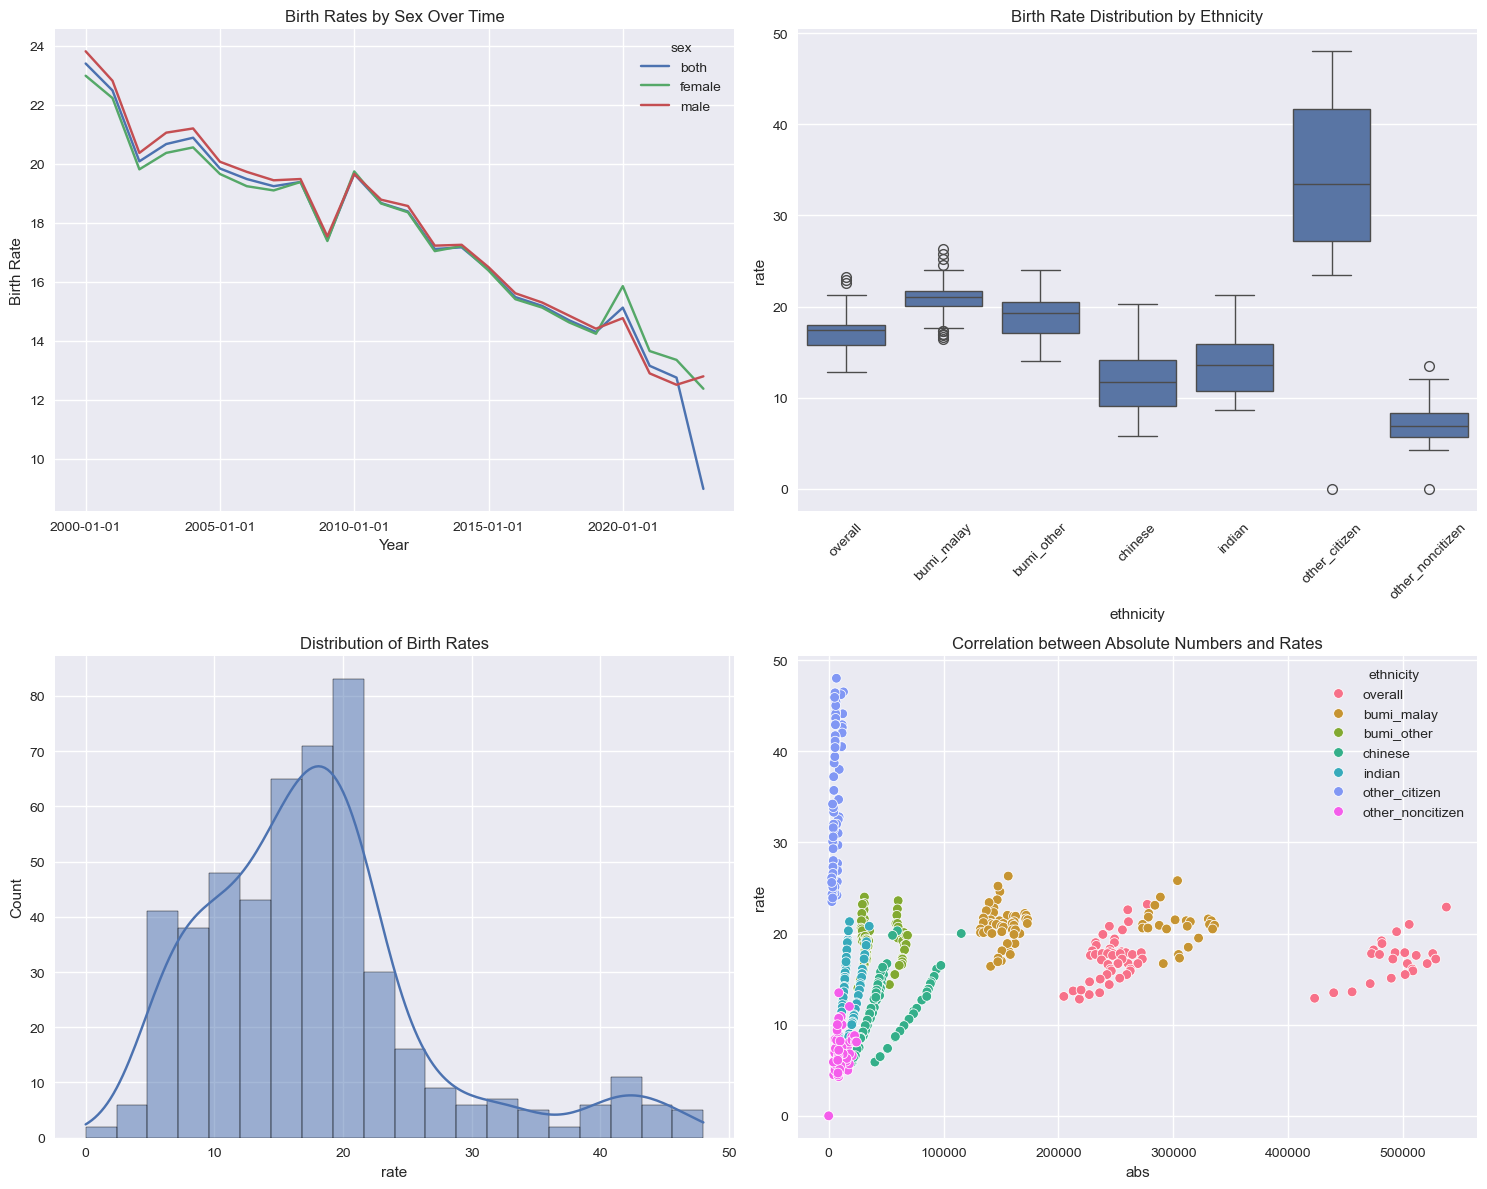

In [14]:
# exploratory data analysis

# Set the style for better visualization
plt.style.use('seaborn-v0_8')  # or you can use other valid styles like 'ggplot'
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Time series of birth rates by sex
pivot_sex = df.pivot_table(values='rate', index='date', columns='sex', aggfunc='mean')
pivot_sex.plot(ax=axes[0,0], title='Birth Rates by Sex Over Time')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Birth Rate')

# Box plot of birth rates by ethnicity
sns.boxplot(data=df, x='ethnicity', y='rate', ax=axes[0,1])
axes[0,1].set_title('Birth Rate Distribution by Ethnicity')
axes[0,1].tick_params(axis='x', rotation=45)

# Distribution of birth rates
sns.histplot(data=df, x='rate', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Birth Rates')

# Correlation between absolute numbers and rates
sns.scatterplot(data=df, x='abs', y='rate', hue='ethnicity', ax=axes[1,1])
axes[1,1].set_title('Correlation between Absolute Numbers and Rates')

plt.tight_layout()

# Additional statistical summary
print("\nSummary Statistics by Ethnicity:")
print(df.groupby('ethnicity')[['abs', 'rate']].describe())

print("\nSummary Statistics by Sex:")
print(df.groupby('sex')[['abs', 'rate']].describe())


Summary Statistics by Ethnicity:
                   abs                                                     \
                 count           mean            std       min        25%   
ethnicity                                                                   
bumi_malay        72.0  202301.305556   73582.039346  132209.0  147399.75   
bumi_other        72.0   41357.722222   15039.503566   25369.0   30689.75   
chinese           72.0   49715.972222   22113.355433   19540.0   35088.25   
indian            72.0   17250.083333    7055.085747    8518.0   11858.50   
other_citizen     70.0    6080.800000    2777.130662       0.0    3981.00   
other_noncitizen  70.0   10884.628571    5078.419574       0.0    7828.75   
overall           72.0  327890.833333  118478.508909  204779.0  243107.00   

                                                 rate                       \
                       50%        75%       max count       mean       std   
ethnicity                              

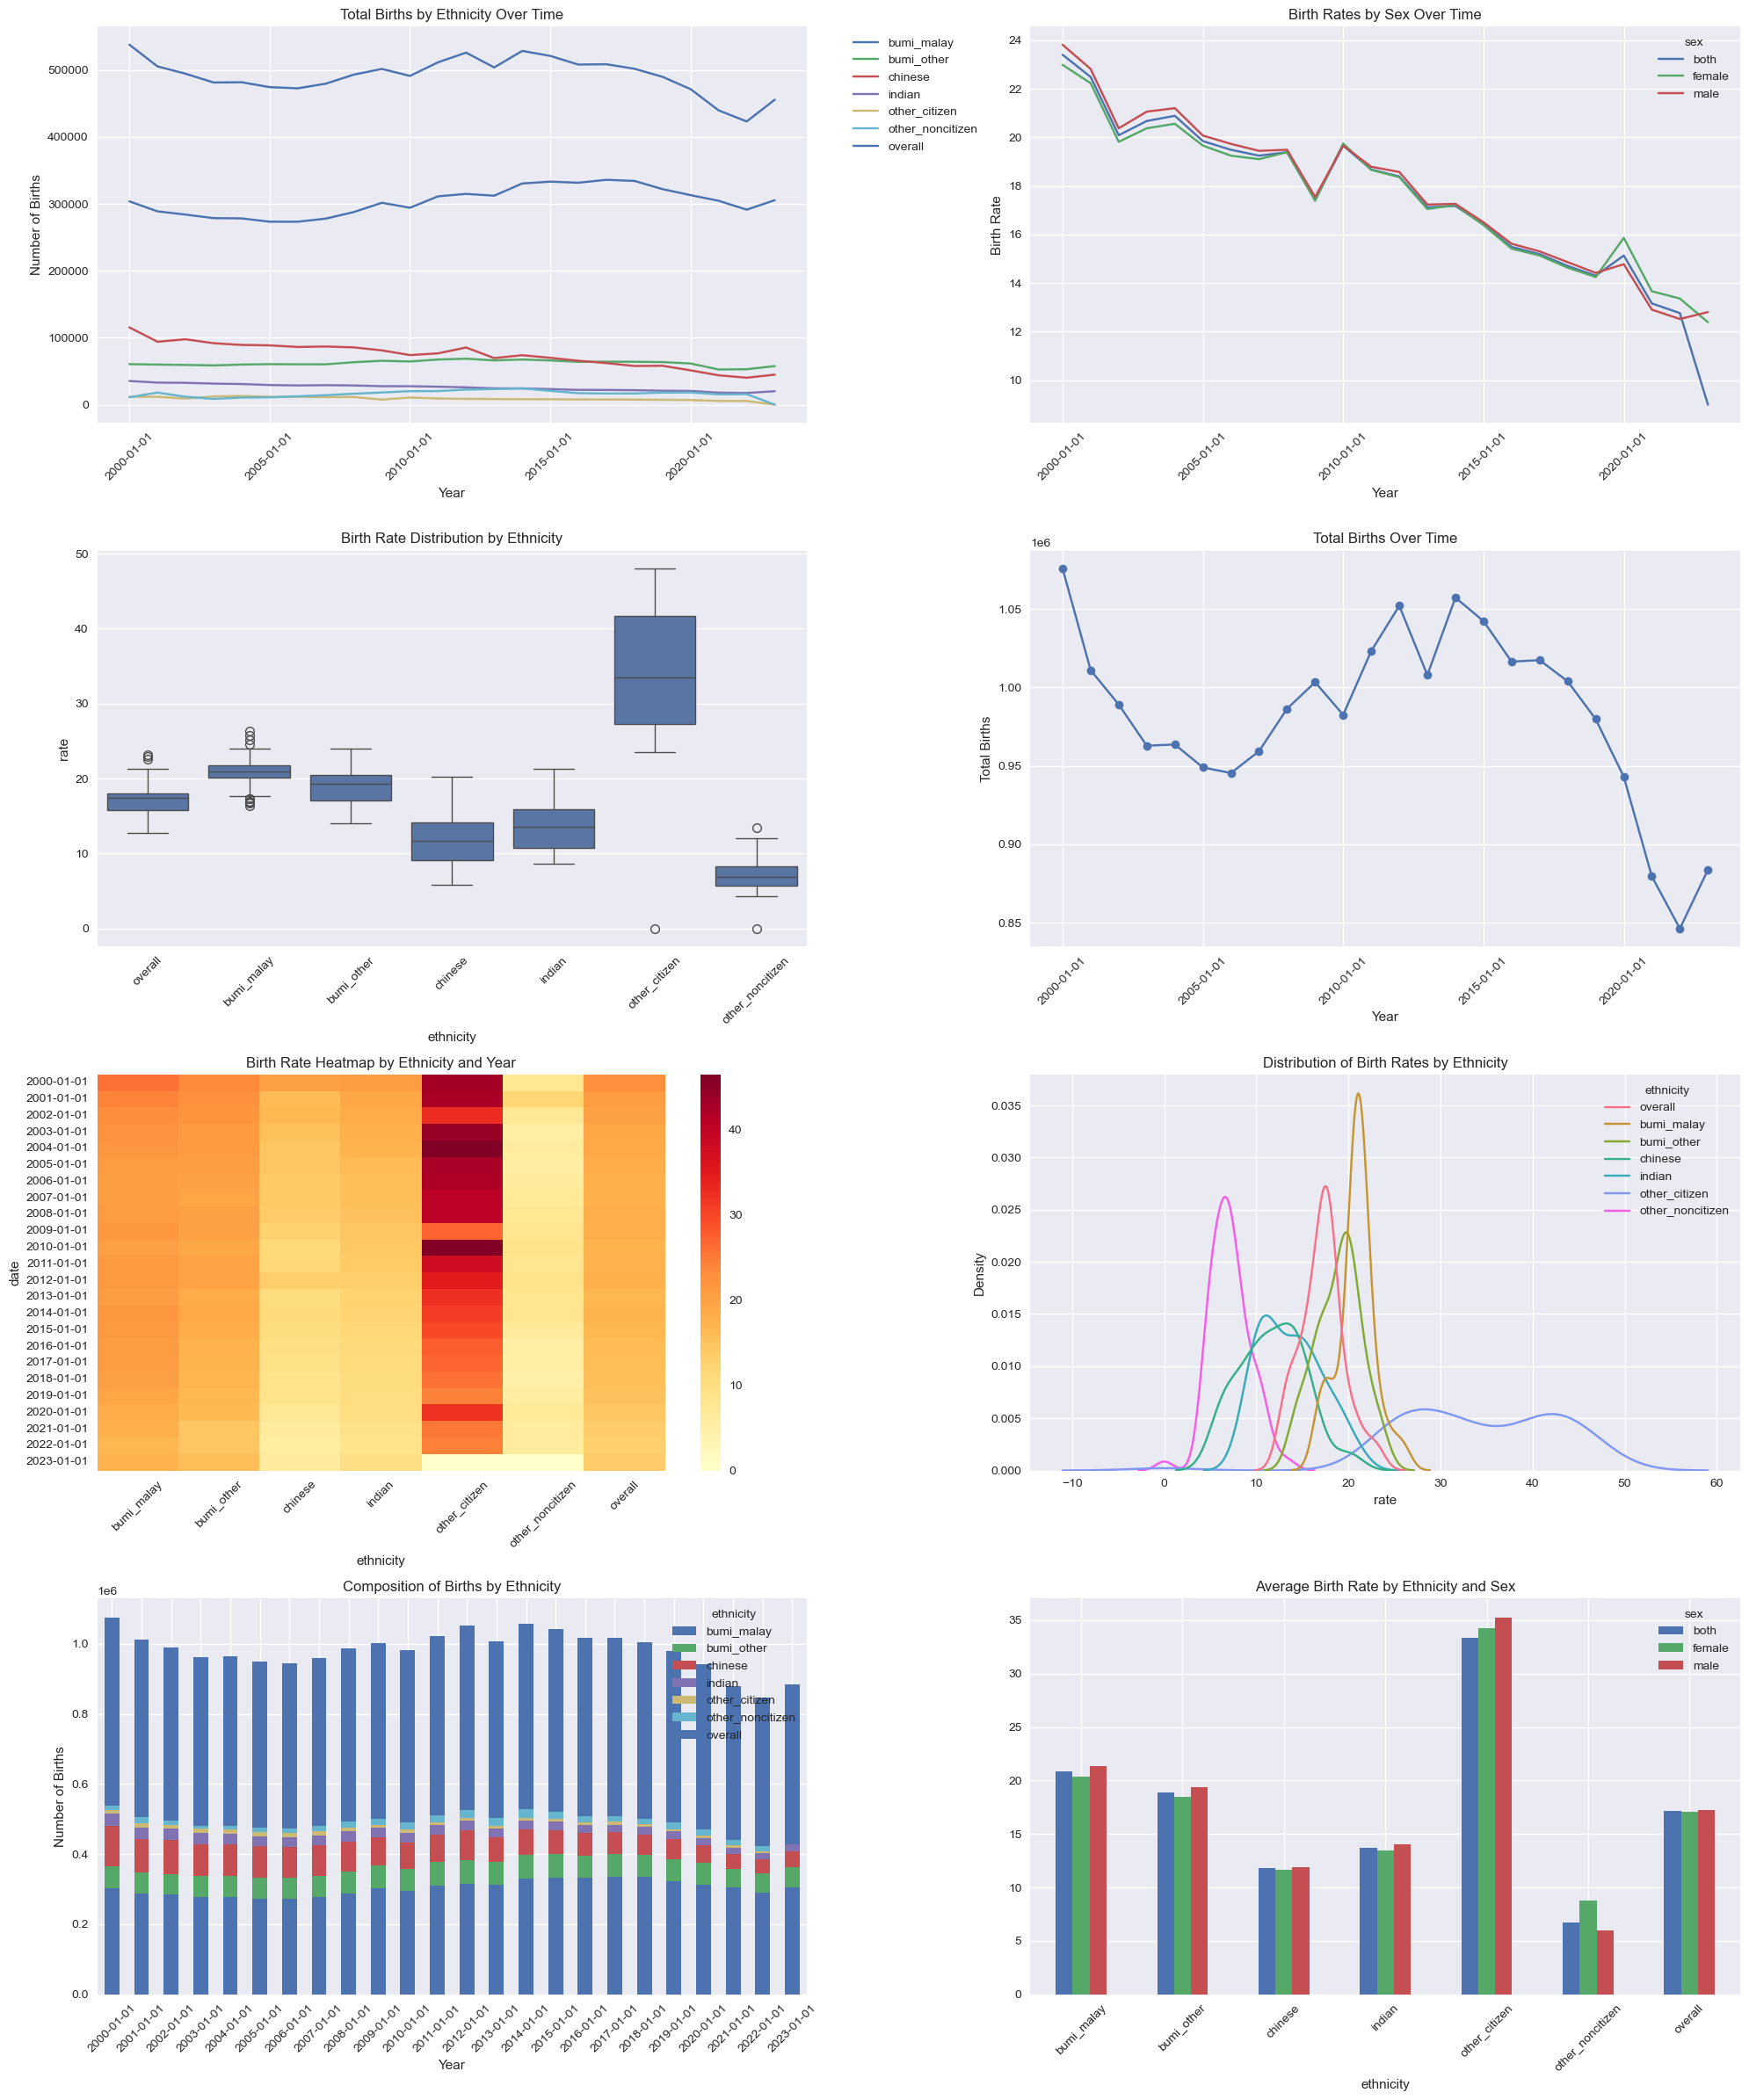

In [15]:
# Create a comprehensive visualization dashboard

# Set up the figure with multiple subplots
plt.style.use('seaborn-v0_8') # nolint
fig = plt.figure(figsize=(20, 24))

# 1. Time series of total births by ethnicity
ax1 = plt.subplot(421)
ethnicity_pivot = df[df['sex']=='both'].pivot_table(values='abs', index='date', columns='ethnicity') # nolint
ethnicity_pivot.plot(ax=ax1)
ax1.set_title('Total Births by Ethnicity Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Births')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# 2. Birth rates comparison between male and female
ax2 = plt.subplot(422)
sex_rates = df.pivot_table(values='rate', index='date', columns='sex')
sex_rates.plot(ax=ax2)
ax2.set_title('Birth Rates by Sex Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Birth Rate')
plt.xticks(rotation=45)

# 3. Ethnicity distribution boxplot
ax3 = plt.subplot(423)
sns.boxplot(data=df, x='ethnicity', y='rate', ax=ax3)
ax3.set_title('Birth Rate Distribution by Ethnicity')
plt.xticks(rotation=45)

# 4. Year-wise trend of total births
ax4 = plt.subplot(424)
yearly_total = df[df['sex']=='both'].groupby('date')['abs'].sum()
yearly_total.plot(kind='line', marker='o', ax=ax4)
ax4.set_title('Total Births Over Time')
ax4.set_xlabel('Year')
ax4.set_ylabel('Total Births')
plt.xticks(rotation=45)

# 5. Heatmap of birth rates by ethnicity and year
ax5 = plt.subplot(425)
pivot_heat = df[df['sex']=='both'].pivot_table(values='rate', index='date', columns='ethnicity')
sns.heatmap(pivot_heat, cmap='YlOrRd', ax=ax5)
ax5.set_title('Birth Rate Heatmap by Ethnicity and Year')
plt.xticks(rotation=45)

# 6. Distribution of birth rates
ax6 = plt.subplot(426)
sns.kdeplot(data=df, x='rate', hue='ethnicity', ax=ax6)
ax6.set_title('Distribution of Birth Rates by Ethnicity')

# 7. Stacked bar chart of births by ethnicity
ax7 = plt.subplot(427)
yearly_ethnic = df[df['sex']=='both'].pivot_table(values='abs', index='date', columns='ethnicity')
yearly_ethnic.plot(kind='bar', stacked=True, ax=ax7)
ax7.set_title('Composition of Births by Ethnicity')
ax7.set_xlabel('Year')
ax7.set_ylabel('Number of Births')
plt.xticks(rotation=45)

# 8. Average birth rate by ethnicity and sex
ax8 = plt.subplot(428)
avg_rate = df.groupby(['ethnicity', 'sex'])['rate'].mean().unstack()
avg_rate.plot(kind='bar', ax=ax8)
ax8.set_title('Average Birth Rate by Ethnicity and Sex')
plt.xticks(rotation=45)

plt.tight_layout()

# Print summary statistics
print("\nSummary Statistics by Ethnicity:")
print(df.groupby('ethnicity')[['abs', 'rate']].describe())

print("\nTrend Analysis:")
print("\nYearly Growth Rate:")
yearly_growth = yearly_total.pct_change() * 100
print(yearly_growth)